# QUESTION 1

In [252]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [253]:
data = pd.read_csv('data.csv')

#### Find missing information and duplicate rows

In [254]:
data.isna().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [255]:
data.duplicated().sum()

0

#### General information

In [256]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


#### Description of data

In [257]:
data.describe().T

count       mean           std    min      25%     50%  \
order_id      5000.0  2500.5000   1443.520003    1.0  1250.75  2500.5   
shop_id       5000.0    50.0788     29.006118    1.0    24.00    50.0   
user_id       5000.0   849.0924     87.798982  607.0   775.00   849.0   
order_amount  5000.0  3145.1280  41282.539349   90.0   163.00   284.0   
total_items   5000.0     8.7872    116.320320    1.0     1.00     2.0   

                  75%       max  
order_id      3750.25    5000.0  
shop_id         75.00     100.0  
user_id        925.00     999.0  
order_amount   390.00  704000.0  
total_items      3.00    2000.0

#### According to the indications: On Shopify, we have exactly 100 sneaker shops and each of these shops sells only one model of shoe, so we can calculate the price for each shoe

In [258]:
data['item_price'] = data['order_amount']/data['total_items']

In [259]:
data.head()

order_id  shop_id  user_id  order_amount  total_items payment_method  \
0         1       53      746           224            2           cash   
1         2       92      925            90            1           cash   
2         3       44      861           144            1           cash   
3         4       18      935           156            1    credit_card   
4         5       18      883           156            1    credit_card   

            created_at  item_price  
0  2017-03-13 12:36:56       112.0  
1  2017-03-03 17:38:52        90.0  
2   2017-03-14 4:23:56       144.0  
3  2017-03-26 12:43:37       156.0  
4   2017-03-01 4:35:11       156.0

#### change type of created_at from object to timestamp

In [260]:
data['created_at'] = pd.to_datetime(data['created_at'])

In [261]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
 7   item_price      5000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 312.6+ KB


In [262]:
data.describe().T

count       mean           std    min      25%     50%  \
order_id      5000.0  2500.5000   1443.520003    1.0  1250.75  2500.5   
shop_id       5000.0    50.0788     29.006118    1.0    24.00    50.0   
user_id       5000.0   849.0924     87.798982  607.0   775.00   849.0   
order_amount  5000.0  3145.1280  41282.539349   90.0   163.00   284.0   
total_items   5000.0     8.7872    116.320320    1.0     1.00     2.0   
item_price    5000.0   387.7428   2441.963725   90.0   133.00   153.0   

                  75%       max  
order_id      3750.25    5000.0  
shop_id         75.00     100.0  
user_id        925.00     999.0  
order_amount   390.00  704000.0  
total_items      3.00    2000.0  
item_price     169.00   25725.0

#### Explore order amount and item price

<AxesSubplot:ylabel='item_price'>

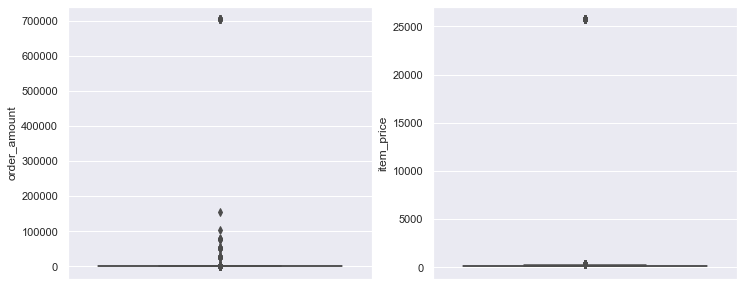

In [263]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.boxplot(y=data["order_amount"], ax=ax[0])
sns.boxplot(y=data["item_price"], ax=ax[1])

From the boxplot for order amount and item price we can see that something is off, the price for a shoe is USD 25,000 which can noise (resulting from bad input) or it can be an outlier, meaning a true value but with a value far off of the others and it can be perceived as an error.
In these situations you can either filter the extremes data points or report another metric like the median. 
For the order amount the median is USD 284 and for the item price is USD 153

#### Filtering for order amount greater than USD 700,000

In [264]:
data[data['order_amount']>=700_000]

order_id  shop_id  user_id  order_amount  total_items payment_method  \
15          16       42      607        704000         2000    credit_card   
60          61       42      607        704000         2000    credit_card   
520        521       42      607        704000         2000    credit_card   
1104      1105       42      607        704000         2000    credit_card   
1362      1363       42      607        704000         2000    credit_card   
1436      1437       42      607        704000         2000    credit_card   
1562      1563       42      607        704000         2000    credit_card   
1602      1603       42      607        704000         2000    credit_card   
2153      2154       42      607        704000         2000    credit_card   
2297      2298       42      607        704000         2000    credit_card   
2835      2836       42      607        704000         2000    credit_card   
2969      2970       42      607        704000         2000    credit_card   
3332      3333       42      607        704000         2000    credit_card   
4056      4057       42      607        704000         2000    credit_card   
4646      4647       42      607        704000         2000    credit_card   
4868      4869       42      607        704000         2000    credit_card   
4882      4883       42      607        704000         2000    credit_card   

              created_at  item_price  
15   2017-03-07 04:00:00       352.0  
60   2017-03-04 04:00:00       352.0  
520  2017-03-02 04:00:00       352.0  
1104 2017-03-24 04:00:00       352.0  
1362 2017-03-15 04:00:00       352.0  
1436 2017-03-11 04:00:00       352.0  
1562 2017-03-19 04:00:00       352.0  
1602 2017-03-17 04:00:00       352.0  
2153 2017-03-12 04:00:00       352.0  
2297 2017-03-07 04:00:00       352.0  
2835 2017-03-28 04:00:00       352.0  
2969 2017-03-28 04:00:00       352.0  
3332 2017-03-24 04:00:00       352.0  
4056 2017-03-28 04:00:00       352.0  
4646 2017-03-02 04:00:00       352.0  
4868 2017-03-22 04:00:00       352.0  
4882 2017-03-25 04:00:00       352.0

From the previous filtering we can see that order amounts for USD 704,000 comes from a single shop and from a single user. The transactions were made using a credit card for the same quantity of items and on different days but at the same time (04:00 am).
From my perspective this seems like an unusual behavior that should be investigating more throughly from a security perspective

#### Filtering data points of order amounts greater than USD 700,000

In [265]:
data_filtered = data[data['order_amount']<700_000]
data_filtered.describe().T

count         mean          std    min     25%     50%     75%  \
order_id      4983.0  2501.060405  1443.090253    1.0  1250.5  2502.0  3750.5   
shop_id       4983.0    50.106362    29.051718    1.0    24.0    50.0    75.0   
user_id       4983.0   849.918322    86.800308  700.0   776.0   850.0   925.0   
order_amount  4983.0   754.091913  5314.092293   90.0   163.0   284.0   390.0   
total_items   4983.0     1.993980     0.983180    1.0     1.0     2.0     3.0   
item_price    4983.0   387.864740  2446.125620   90.0   133.0   153.0   168.0   

                   max  
order_id        5000.0  
shop_id          100.0  
user_id          999.0  
order_amount  154350.0  
total_items        8.0  
item_price     25725.0

We can see that after filtering the orders greater than USD 700,000 we still see some unsual data. In the field item price we notice that some shoes sell for around USD 25,725 which differ greatly from the median which is USD 153

In [266]:
data_filtered[data_filtered['item_price']>=25_000]

order_id  shop_id  user_id  order_amount  total_items payment_method  \
160        161       78      990         25725            1    credit_card   
490        491       78      936         51450            2          debit   
493        494       78      983         51450            2           cash   
511        512       78      967         51450            2           cash   
617        618       78      760         51450            2           cash   
691        692       78      878        154350            6          debit   
1056      1057       78      800         25725            1          debit   
1193      1194       78      944         25725            1          debit   
1204      1205       78      970         25725            1    credit_card   
1259      1260       78      775         77175            3    credit_card   
1384      1385       78      867         25725            1           cash   
1419      1420       78      912         25725            1           cash   
1452      1453       78      812         25725            1    credit_card   
1529      1530       78      810         51450            2           cash   
2270      2271       78      855         25725            1    credit_card   
2452      2453       78      709         51450            2           cash   
2492      2493       78      834        102900            4          debit   
2495      2496       78      707         51450            2           cash   
2512      2513       78      935         51450            2          debit   
2548      2549       78      861         25725            1           cash   
2564      2565       78      915         77175            3          debit   
2690      2691       78      962         77175            3          debit   
2773      2774       78      890         25725            1           cash   
2818      2819       78      869         51450            2          debit   
2821      2822       78      814         51450            2           cash   
2906      2907       78      817         77175            3          debit   
2922      2923       78      740         25725            1          debit   
3085      3086       78      910         25725            1           cash   
3101      3102       78      855         51450            2    credit_card   
3151      3152       78      745         25725            1    credit_card   
3167      3168       78      927         51450            2           cash   
3403      3404       78      928         77175            3          debit   
3440      3441       78      982         25725            1          debit   
3705      3706       78      828         51450            2    credit_card   
3724      3725       78      766         77175            3    credit_card   
3780      3781       78      889         25725            1           cash   
4040      4041       78      852         25725            1           cash   
4079      4080       78      946         51450            2           cash   
4192      4193       78      787         77175            3    credit_card   
4311      4312       78      960         51450            2          debit   
4412      4413       78      756         51450            2          debit   
4420      4421       78      969         77175            3          debit   
4505      4506       78      866         25725            1          debit   
4584      4585       78      997         25725            1           cash   
4715      4716       78      818         77175            3          debit   
4918      4919       78      823         25725            1           cash   

              created_at  item_price  
160  2017-03-12 05:56:57     25725.0  
490  2017-03-26 17:08:19     25725.0  
493  2017-03-16 21:39:35     25725.0  
511  2017-03-09 07:23:14     25725.0  
617  2017-03-18 11:18:42     25725.0  
691  2017-03-27 22:51:43     25725.0  
1056 2017-03-15 10:16:45     25725.0  
1193 2017-03-16 16:38:26   

Filtering item price for values greater than USD 25,000 we notice they all belong to the Shop with ID 78, and the transactions varies between debit, cash, and credit cards. Paying with cash for the amount of USD 25,000 seems suspicious and it can be an error on the input data. This should also be investigated with more detail

#### Filtering item prices greater than \\$25,000 

In [267]:
#filtering item price
data_filtered_amt_price = data_filtered[data_filtered['item_price']<25_000]
data_filtered_amt_price.describe().T

count         mean          std    min     25%     50%     75%  \
order_id      4937.0  2499.551347  1444.069407    1.0  1248.0  2497.0  3751.0   
shop_id       4937.0    49.846465    29.061131    1.0    24.0    50.0    74.0   
user_id       4937.0   849.752279    86.840313  700.0   775.0   850.0   925.0   
order_amount  4937.0   302.580514   160.804912   90.0   163.0   284.0   387.0   
total_items   4937.0     1.994734     0.982821    1.0     1.0     2.0     3.0   
item_price    4937.0   151.788536    29.034215   90.0   132.0   153.0   166.0   

                 max  
order_id      5000.0  
shop_id        100.0  
user_id        999.0  
order_amount  1760.0  
total_items      8.0  
item_price     352.0

<AxesSubplot:ylabel='item_price'>

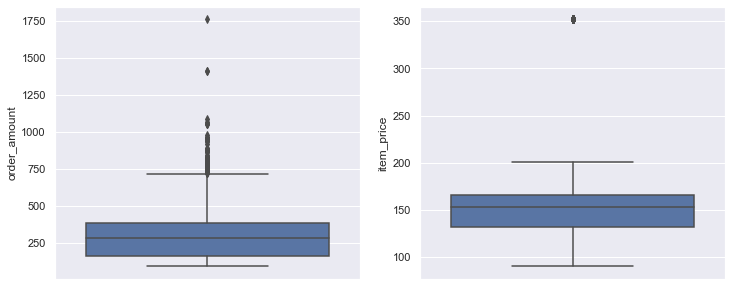

In [268]:
#explore order amount and item price of filtered data
fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.boxplot(y=data_filtered_amt_price["order_amount"], ax=ax[0])
sns.boxplot(y=data_filtered_amt_price["item_price"], ax=ax[1])


The information from the filtered data seems more appropiate where the order amount has an average of USD 302.58 and a median of USD 284 while price item has an average of USD 151.79 and a median of USD 153

### Plotting order amount and total items by payment method

<AxesSubplot:xlabel='payment_method', ylabel='total_items'>

<Figure size 576x576 with 0 Axes>

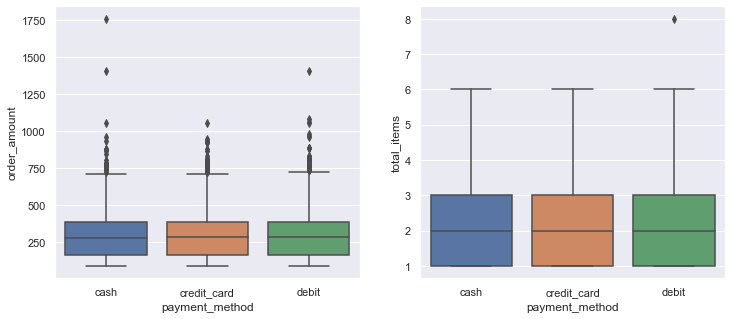

In [269]:
plt.figure(figsize=(8,8))
fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.boxplot(data=data_filtered_amt_price,x='payment_method',y='order_amount', ax=ax[0])
sns.boxplot(data=data_filtered_amt_price,x='payment_method',y='total_items', ax=ax[1])

#### When grouping the data for by type of payment we see that there is no much difference in the mean for order amount or total items

## Grouping data

### group by store

In [270]:
grp_store = data_filtered_amt_price.groupby('shop_id').agg({'order_amount':'mean'})

In [271]:
grp_store_sorted = grp_store.sort_values(['order_amount'], ascending=False)

In [272]:
grp_store_sorted.head(10)

order_amount
shop_id              
42         652.235294
50         403.545455
90         403.224490
38         390.857143
81         384.000000
6          383.508475
89         379.147541
33         376.275000
51         361.804348
59         358.966667

In [273]:
grp_store_sorted.tail(10)

order_amount
shop_id              
9          234.000000
25         232.916667
56         218.189189
7          218.000000
93         214.474576
53         214.117647
100        213.675000
32         189.976190
2          174.327273
92         162.857143

#### Grouping by the Store id we can calculate the average for the order amount and later on we can obtain the top 10 stores and also the last 10. Later on, we can analyse in more depth why the top store (42) almost triple the order amount of the stores at the end. Maybe is a seasonal aspect or a trend.

### group by user

In [274]:
grp_user = data_filtered_amt_price.groupby('user_id').agg({'order_amount':'mean'})

In [275]:
grp_user_sorted = grp_user.sort_values(['order_amount'], ascending=False)

In [276]:
grp_user_sorted.head(10)

order_amount
user_id              
754        458.785714
926        420.916667
828        418.090909
747        412.818182
702        406.615385
701        397.076923
830        389.545455
756        386.761905
739        383.555556
736        382.100000

In [277]:
grp_user_sorted.tail(10)

order_amount
user_id              
902        234.222222
983        233.750000
967        233.400000
928        232.866667
988        228.187500
892        227.307692
899        226.666667
827        226.500000
939        219.600000
864        209.157895

#### When grouping by user id, we can analyse what are some of the characteristics that describe the top 10 and later on we can develop marketing campaings targeted to these type of users to offer them related products and services

## Evolution of sales in the month

#### obtaining the day of each sale

In [278]:
data_filtered_amt_price['day'] = data_filtered_amt_price.created_at.dt.day

C:\Users\johnc\AppData\Local\Temp/ipykernel_10064/2512812004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered_amt_price['day'] = data_filtered_amt_price.created_at.dt.day


In [279]:
data_filtered_amt_price

order_id  shop_id  user_id  order_amount  total_items payment_method  \
0            1       53      746           224            2           cash   
1            2       92      925            90            1           cash   
2            3       44      861           144            1           cash   
3            4       18      935           156            1    credit_card   
4            5       18      883           156            1    credit_card   
...        ...      ...      ...           ...          ...            ...   
4995      4996       73      993           330            2          debit   
4996      4997       48      789           234            2           cash   
4997      4998       56      867           351            3           cash   
4998      4999       60      825           354            2    credit_card   
4999      5000       44      734           288            2          debit   

              created_at  item_price  day  
0    2017-03-13 12:36:56       112.0   13  
1    2017-03-03 17:38:52        90.0    3  
2    2017-03-14 04:23:56       144.0   14  
3    2017-03-26 12:43:37       156.0   26  
4    2017-03-01 04:35:11       156.0    1  
...                  ...         ...  ...  
4995 2017-03-30 13:47:17       165.0   30  
4996 2017-03-16 20:36:16       117.0   16  
4997 2017-03-19 05:42:42       117.0   19  
4998 2017-03-16 14:51:18       177.0   16  
4999 2017-03-18 15:48:18       144.0   18  

[4937 rows x 9 columns]

#### Plotting a regression line
From this plot we can see that there is a slight positive trend in the order amounts throught the month

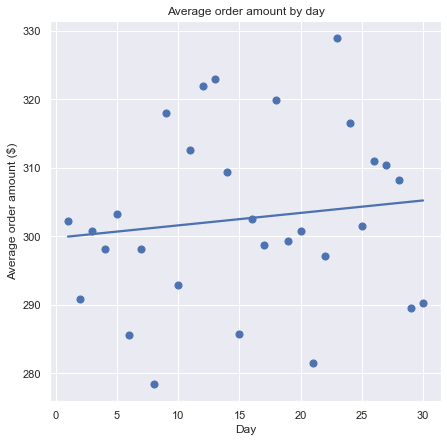

In [280]:
plt.figure(figsize=(7,7))
ax = sns.regplot(data=data_filtered_amt_price, y='order_amount',x='day', x_estimator=np.mean, ci=None)
ax.set_title('Average order amount by day')
ax.set_ylabel('Average order amount ($)')
ax.set_xlabel('Day')
plt.show()

In [281]:
grp_day = data_filtered_amt_price.groupby('day').agg({'order_amount':'sum'}).reset_index()

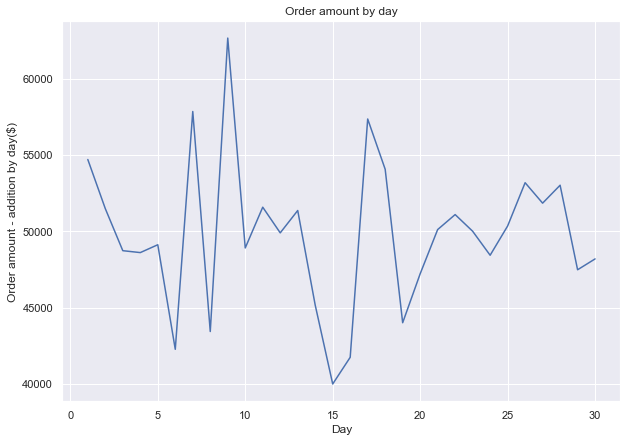

In [282]:
plt.figure(figsize=(10,7))
ax = sns.lineplot(data=grp_day, x="day", y="order_amount")
ax.set_title('Order amount by day')
ax.set_ylabel('Order amount - addition by day($)')
ax.set_xlabel('Day')
plt.show()

We can also plot a line graph to try to see some trends or characteristics in order amounts. 
Some of the highest sales are at the start of the month and decreases to the end, and at the middle of the month is where we have a slump

## Summary
1. **Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.** The calculation of the average can be misleading when there are extreme values in the dataset. Like in this case we saw some extreme values in the orders amount and price of each item. A better indicator is the median which is less susceptible to extreme values 
2. **What metric would you report for this dataset?** A more reliable measurement will be the median
3. **What is its value?** The median order value will be USD 284
4. Additional:
    * After removing extreme values, the average order value is USD 302.59
    * The user with id 607 needs to be analyze in more detail as well as the store with id 78
    * When taking the average order value per day, it has a slight positive trend throughout the month

# QUESTION 2

## Part 1 - How many orders were shipped by Speedy Express in total?
SELECT count(\*)<br>
FROM Shippers as ship<br>
JOIN orders as ords<br>
ON ship.ShipperID = ords.ShipperID<br>
WHERE ship.ShipperName = 'Speedy Express'<br>
**answer:** 54

## Part 2 - What is the last name of the employee with the most orders?
SELECT emp.LastName, emp.FirstName, count(\*) as total<br>
FROM Employees as emp<br>
JOIN orders as ords<br>
ON emp.EmployeeID = ords.EmployeeID<br>
GROUP BY emp.EmployeeID<br>
ORDER BY total DESC<br>
LIMIT 1<br>
**answer:**
lastname:Peacock, firstname:Margaret

## Part 3 - What product was ordered the most by customers in Germany?
SELECT prod.ProductName, count(\*) as total_orders<br>
FROM Products as prod<br>
JOIN OrderDetails as ordsdetails<br>
ON prod.ProductID = ordsdetails.ProductID<br>
JOIN orders as ords<br>
ON ords.OrderID = ordsdetails.OrderID<br>
JOIN Customers as cust<br>
ON ords.CustomerID = cust.CustomerID<br>
WHERE cust.Country = 'Germany'<br>
GROUP BY prod.ProductID<br>
ORDER BY total_orders DESC<br>
LIMIT 1<br>
**answer:** 
Gorgonzola Telino, total orders: 5